In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import json
#from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, confusion_matrix
import datetime, time
import gensim
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import preprocess_documents
from gensim.models import doc2vec
from collections import namedtuple
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans

In [4]:
train_df = pd.read_json("/content/gdrive/MyDrive/ML/Тестовые задания/train.json")
train_df = train_df.reset_index()
train_df = train_df.drop(['index'], axis = 1)
train_df = train_df.rename(columns={"price": "f_price"})

In [6]:
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,f_price,street_address,interest_level
0,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
1,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
2,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
3,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
4,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [ ]:
test_df = pd.read_json("two-sigma-connect-rental-listing-inquiries/test.json/test.json")
test_df = test_df.reset_index()
test_df = test_df.drop(['index'], axis = 1)
test_df = test_df.rename(columns={"price": "f_price"})

In [ ]:
kek = train_df[(test_df.listing_id == 6812215)]

C:\Users\lilac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
kek.f_price

Series([], Name: f_price, dtype: int64)

In [ ]:
train_df.shape

(49352, 15)

In [ ]:
sum(train_df.num_photos) * 129 / 1024 / 1024

34.04245948791504

In [ ]:
data = train_df[['interest_level', 'latitude', 'longitude']]

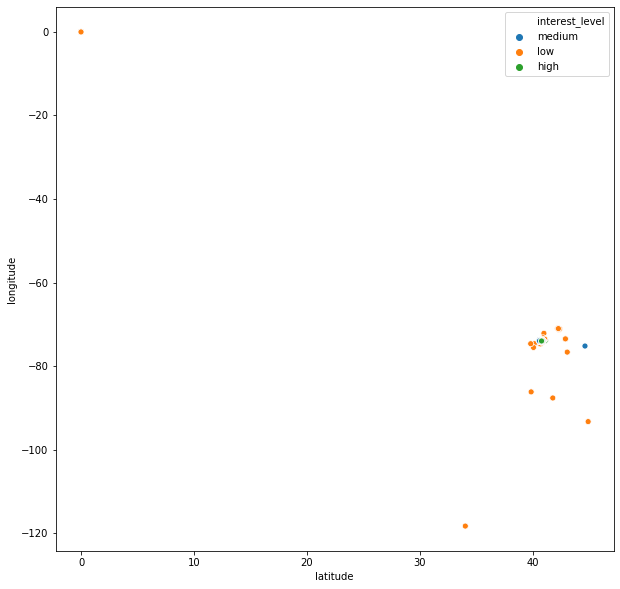

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x = "latitude", y = "longitude", hue = 'interest_level',
                     data = data)

In [ ]:
list1 = [math.cos(i) for i in data.longitude]
list2 = [math.cos(i) for i in data.latitude]
x = []
for num1, num2 in zip(list1, list2):
    x.append(num1 * num2)

In [ ]:
list1 = [math.sin(i) for i in data.longitude]
list2 = [math.cos(i) for i in data.latitude]
y = []
for num1, num2 in zip(list1, list2):
    y.append(num1 * num2)

In [ ]:
z = [math.sin(i) for i in data.latitude]

In [ ]:
data['x'] = x
data['y'] = y
data['z'] = z

C:\Users\lilac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lilac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lilac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
data

,interest_level,latitude,longitude,x,y,z
0,medium,40.7108,-73.9539,-0.125073,-0.983655,0.129539
1,low,40.7513,-73.9722,-0.143691,-0.985587,0.089285
2,medium,40.7575,-73.9625,-0.134196,-0.987464,0.083109
3,medium,40.7145,-73.9425,-0.113906,-0.985486,0.125870
4,low,40.7439,-73.9743,-0.145660,-0.984602,0.096653
...,...,...,...,...,...,...
49347,low,40.8433,-73.9396,-0.111937,-0.993712,-0.002596
49348,medium,40.8198,-73.9578,-0.129975,-0.991297,0.020903
49349,medium,40.5765,-73.9554,-0.123195,-0.957407,0.261141
49350,medium,40.7448,-74.0017,-0.172595,-0.980327,0.095758


In [ ]:
df = data[['x', 'y', 'z']]

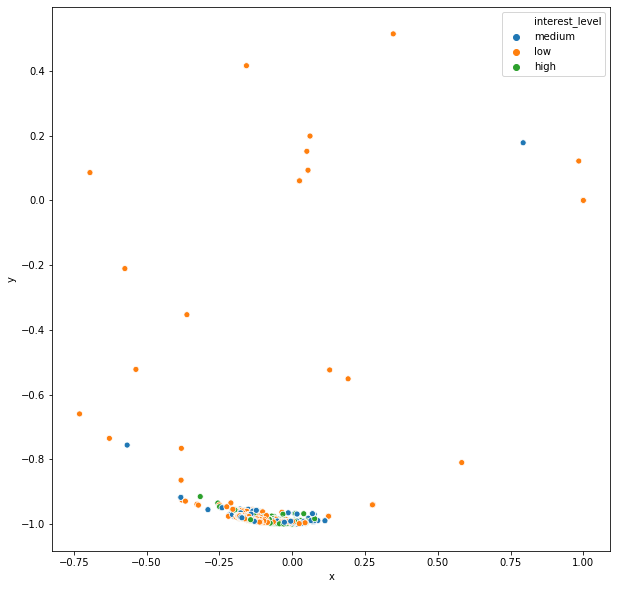

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x = "x", y = "y", hue = 'interest_level',
                     data = data)

In [ ]:
kmeans = KMeans(n_clusters = 6, random_state = 0).fit(df)

In [ ]:
data['class'] = kmeans.labels_

C:\Users\lilac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Y_train = data.interest_level
X_train = data[['latitude', 'longitude', 'x', 'y', 'z','class']]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [ ]:
kfold = StratifiedKFold(n_splits = 10)

In [ ]:
random_state = 2
classifiers = []
classifiers.append(SVC(gamma = 'scale', random_state=random_state))
classifiers.append(RandomForestClassifier(n_estimators = 100, random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(LogisticRegression(multi_class = 'auto', random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res_2 = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","LogisticRegression","LinearDiscriminantAnalysis"]})

C:\Users\lilac\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\lilac\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\lilac\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\lilac\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\lilac\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

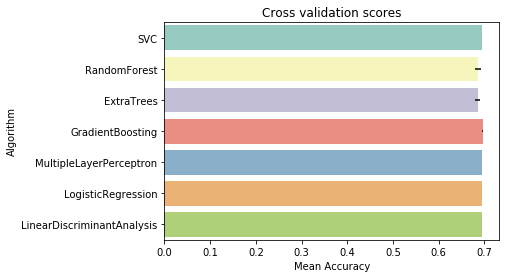

In [ ]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

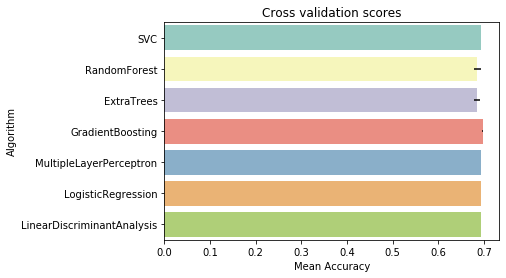

In [ ]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res_1, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
cv_res_1.CrossValMeans

0    0.694683
1    0.685402
2    0.684491
3    0.697358
4    0.694501
5    0.694399
6    0.694379
Name: CrossValMeans, dtype: float64

In [ ]:
cv_res.CrossValMeans

0    0.694683
1    0.686051
2    0.685504
3    0.696709
4    0.694683
5    0.694683
6    0.694663
Name: CrossValMeans, dtype: float64

In [ ]:
cv_res_2.CrossValMeans

0    0.694683
1    0.685423
2    0.685261
3    0.697419
4    0.694602
5    0.694399
6    0.694359
Name: CrossValMeans, dtype: float64

Новый признак: количество фотографий.

In [ ]:
train_df["num_photos"] = list((len(x) for x in train_df['photos']))
train_df = train_df.drop(['photos'], axis = 1)

test_df["num_photos"] = list((len(x) for x in test_df['photos']))
test_df = test_df.drop(['photos'], axis = 1)

Удаляем различные id, так как они уникальны для каждого объекта и не несут полезной информации.

In [ ]:
train_df = train_df.drop(['building_id', 'listing_id', 'manager_id'], axis = 1)
test_df = test_df.drop(['building_id', 'listing_id', 'manager_id'], axis = 1)

Новые признаки: 
Количество секунд с 1 января 1970 года.
Год, месяц, день, час создания.

In [ ]:
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["unix_time"] = list((time.mktime(x.timetuple()) for x in train_df['created']))

test_df["created"] = pd.to_datetime(test_df["created"])
test_df["unix_time"] = list((time.mktime(x.timetuple()) for x in test_df['created']))

train_df["created_year"] = train_df["created"].dt.year
train_df["created_month"] = train_df["created"].dt.month
train_df["created_day"] = train_df["created"].dt.day
train_df["created_hour"] = train_df["created"].dt.hour
train_df = train_df.drop(['created'], axis = 1)

test_df["created_year"] = test_df["created"].dt.year
test_df["created_month"] = test_df["created"].dt.month
test_df["created_day"] = test_df["created"].dt.day
test_df["created_hour"] = test_df["created"].dt.hour
test_df = test_df.drop(['created'], axis = 1)

Новые признаки: Номер дома, Название улицы.

In [ ]:
train_df["num_house"] = list((int(x.split(' ', 1)[0]) if x.split(' ', 1)[0].isdigit() else 0 for x in train_df['street_address']))
train_df["name_street"] = list((x.split(' ', 1)[1] if x.split(' ', 1)[0].isdigit() else x for x in train_df['street_address']))
train_df = train_df.drop(['display_address', 'street_address'], axis = 1)

test_df["num_house"] = list((int(x.split(' ', 1)[0]) if x.split(' ', 1)[0].isdigit() else 0 for x in test_df['street_address']))
res = []
for x in test_df['street_address']:
    if x.split(' ', 1)[0].isdigit():
        if(len(x.split(' ', 1)) > 1):
            res.append(x.split(' ', 1)[1])
        else:
            res.append('none')
    else:
        res.append(x)
test_df["name_street"] = res
test_df = test_df.drop(['display_address', 'street_address'], axis = 1)

Преобразуем признак features с помощью методов NLP

In [ ]:
qwer = list((' '.join(x) for x in train_df['features']))
filtered_sentence = list((remove_stopwords(x) for x in qwer))
preprocess_filtered_sentence = preprocess_documents(filtered_sentence)
preprocess_filtered_sentence = list((' '.join(x) for x in preprocess_filtered_sentence))

qwer_test = list((' '.join(x) for x in test_df['features']))
filtered_sentence_test = list((remove_stopwords(x) for x in qwer_test))
preprocess_filtered_sentence_test = preprocess_documents(filtered_sentence_test)
preprocess_filtered_sentence_test = list((' '.join(x) for x in preprocess_filtered_sentence_test))

In [ ]:
count_vect = CountVectorizer()
count_vect.fit(preprocess_filtered_sentence)
X_train_counts = count_vect.transform(preprocess_filtered_sentence)

tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)

X_train_tf = tf_transformer.transform(X_train_counts)
res_train = pd.DataFrame(X_train_tf.todense())
res_train.columns = count_vect.get_feature_names()

X_test_counts = count_vect.transform(preprocess_filtered_sentence_test)
X_test_tf = tf_transformer.transform(X_test_counts)
res_test = pd.DataFrame(X_test_tf.todense())
res_test.columns = count_vect.get_feature_names()

tf-idf + pca

In [ ]:
pca = PCA(.99)
pca.fit(res_train)
pca_train = pca.transform(res_train)
res_pca_train = pd.DataFrame(pca_train, columns = [('pca_' + str(x)) for x in range(len(pca_train[0]))])
train_df = pd.concat([train_df, res_pca_train], axis = 1)

pca_test = pca.transform(res_test)
res_pca_test = pd.DataFrame(pca_test, columns = [('pca_' + str(x)) for x in range(len(pca_test[0]))])
test_df = pd.concat([test_df, res_pca_test], axis = 1)


только tf-idf

In [ ]:
train_df = pd.concat([train_df, res_train], axis = 1)
test_df = pd.concat([test_df, res_test], axis = 1)
train_df = train_df.drop(['features'], axis = 1)
test_df = test_df.drop(['features'], axis = 1)

Преобразуем признак description с помощью методов NLP

In [ ]:
filtered_sentence = list((remove_stopwords(x) for x in train_df['description']))
preprocess_filtered_sentence = preprocess_documents(filtered_sentence)
preprocess_filtered_sentence = list((' '.join(x) for x in preprocess_filtered_sentence))
docs = []
analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
for i, text in enumerate(preprocess_filtered_sentence):
    words = text.lower().split()
    tags = [i]
    docs.append(analyzedDocument(words, tags))
model = doc2vec.Doc2Vec(docs, vector_size = 100, epochs =  100)
res = []
for x in range(0, len(model.docvecs)):
    res.append(model.docvecs[x])
res_Doc2Vec = pd.DataFrame(res, columns = [('doc_to_vec_' + str(x)) for x in range(100)])
train_df = pd.concat([train_df, res_Doc2Vec], axis = 1)

In [ ]:
filtered_sentence = list((remove_stopwords(x) for x in test_df['description']))
preprocess_filtered_sentence = preprocess_documents(filtered_sentence)
preprocess_filtered_sentence = list((' '.join(x) for x in preprocess_filtered_sentence))
docs = []
analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
for i, text in enumerate(preprocess_filtered_sentence):
    words = text.lower().split()
    tags = [i]
    docs.append(analyzedDocument(words, tags))
model = doc2vec.Doc2Vec(docs, vector_size = 100, epochs =  100)
res = []
for x in range(0, len(model.docvecs)):
    res.append(model.docvecs[x])
res_Doc2Vec = pd.DataFrame(res, columns = [('doc_to_vec_' + str(x)) for x in range(100)])
test_df = pd.concat([test_df, res_Doc2Vec], axis = 1)

In [ ]:
train_df["num_description"] = list((len(x) for x in train_df['description']))
train_df = train_df.drop(['description'], axis = 1)

test_df["num_description"] = list((len(x) for x in test_df['description']))
test_df = test_df.drop(['description'], axis = 1)

Настройка модели

In [ ]:
df = train_df

In [ ]:
X = df.drop('interest_level', axis = 1)
y = df['interest_level']

In [ ]:
X.head()

,bathrooms,bedrooms,latitude,longitude,f_price,num_photos,unix_time,created_year,created_month,created_day,...,doc_to_vec_91,doc_to_vec_92,doc_to_vec_93,doc_to_vec_94,doc_to_vec_95,doc_to_vec_96,doc_to_vec_97,doc_to_vec_98,doc_to_vec_99,num_description
0,1.0,1,40.7108,-73.9539,2400,12,1.466031e+09,2016,6,16,...,-0.593057,-1.284277,-0.487485,-0.630922,0.016163,-0.220588,-0.834877,0.536748,-1.302876,553
1,1.0,2,40.7513,-73.9722,3800,6,1.464735e+09,2016,6,1,...,-0.885217,0.385645,-0.855988,0.211885,-0.005210,0.881613,0.535651,-0.577434,-0.359812,827
2,1.0,2,40.7575,-73.9625,3495,6,1.465892e+09,2016,6,14,...,0.409128,0.263820,0.550478,-0.378650,0.175911,-1.148546,0.081031,0.291752,-2.509769,799
3,1.5,3,40.7145,-73.9425,3000,5,1.466730e+09,2016,6,24,...,-1.673121,-0.537847,-0.087829,-0.436695,1.710143,0.346983,0.549725,0.566578,-0.699154,588
4,1.0,0,40.7439,-73.9743,2795,4,1.467061e+09,2016,6,28,...,0.058242,0.678297,-0.227353,0.971170,-0.443900,-0.934101,-1.119756,-0.313487,-0.166139,344


In [ ]:
skf = KFold(n_splits = 2)

In [ ]:
model = CatBoostClassifier(iterations = 1000,
                           depth = 8,
                           loss_function = 'MultiClass',
                           verbose = False)
f1 = []

In [ ]:
for train_index, test_index in skf.split(y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    train_pool = Pool(X_train, y_train, cat_features=[12])
    test_pool = Pool(X_test, cat_features=[12])
    model.fit(train_pool)
    preds = model.predict(test_pool, prediction_type = 'Class')
    f1.append(f1_score(y_test, preds.flatten(), average = 'macro'))
    
    y_actu = pd.Series(y_test, name = 'Actual')
    y_pred = pd.Series(preds.flatten(), name = 'Predicted')
    df_confusion = pd.crosstab(y_actu, y_pred)

In [ ]:
f1

[0.5036774529111784, 0.5416437063025752]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

train_pool = Pool(X_train, y_train, cat_features = [12])
test_pool = Pool(X_test, y_test, cat_features = [12])

model = CatBoostClassifier(iterations = 5000, depth = 6,
          eval_metric = 'MultiClass', od_pval = 0.0001,
          verbose = True)

model.fit(train_pool, eval_set = test_pool)

0:	learn: 1.0779815	test: 1.0781571	best: 1.0781571 (0)	total: 178ms	remaining: 14m 52s
1:	learn: 1.0583471	test: 1.0586729	best: 1.0586729 (1)	total: 313ms	remaining: 13m 1s
2:	learn: 1.0408576	test: 1.0412793	best: 1.0412793 (2)	total: 453ms	remaining: 12m 34s
3:	learn: 1.0238156	test: 1.0244116	best: 1.0244116 (3)	total: 596ms	remaining: 12m 24s
4:	learn: 1.0082346	test: 1.0090097	best: 1.0090097 (4)	total: 733ms	remaining: 12m 12s
5:	learn: 0.9931907	test: 0.9940738	best: 0.9940738 (5)	total: 863ms	remaining: 11m 58s
6:	learn: 0.9788444	test: 0.9799298	best: 0.9799298 (6)	total: 1s	remaining: 11m 54s
7:	learn: 0.9660664	test: 0.9672272	best: 0.9672272 (7)	total: 1.13s	remaining: 11m 47s
8:	learn: 0.9534914	test: 0.9547392	best: 0.9547392 (8)	total: 1.28s	remaining: 11m 48s
9:	learn: 0.9421560	test: 0.9435658	best: 0.9435658 (9)	total: 1.42s	remaining: 11m 46s
10:	learn: 0.9312102	test: 0.9327552	best: 0.9327552 (10)	total: 1.54s	remaining: 11m 41s
11:	learn: 0.9204405	test: 0.92214

92:	learn: 0.6745683	test: 0.6815894	best: 0.6815894 (92)	total: 12.6s	remaining: 11m 6s
93:	learn: 0.6737570	test: 0.6807546	best: 0.6807546 (93)	total: 12.8s	remaining: 11m 6s
94:	learn: 0.6731227	test: 0.6800537	best: 0.6800537 (94)	total: 12.9s	remaining: 11m 6s
95:	learn: 0.6725768	test: 0.6794715	best: 0.6794715 (95)	total: 13s	remaining: 11m 5s
96:	learn: 0.6719285	test: 0.6787549	best: 0.6787549 (96)	total: 13.2s	remaining: 11m 5s
97:	learn: 0.6712595	test: 0.6780411	best: 0.6780411 (97)	total: 13.3s	remaining: 11m 4s
98:	learn: 0.6706484	test: 0.6774723	best: 0.6774723 (98)	total: 13.4s	remaining: 11m 4s
99:	learn: 0.6702212	test: 0.6771197	best: 0.6771197 (99)	total: 13.6s	remaining: 11m 4s
100:	learn: 0.6694684	test: 0.6762696	best: 0.6762696 (100)	total: 13.7s	remaining: 11m 3s
101:	learn: 0.6688555	test: 0.6757343	best: 0.6757343 (101)	total: 13.8s	remaining: 11m 3s
102:	learn: 0.6681132	test: 0.6749420	best: 0.6749420 (102)	total: 13.9s	remaining: 11m 2s
103:	learn: 0.667

183:	learn: 0.6339924	test: 0.6443500	best: 0.6443500 (183)	total: 24.5s	remaining: 10m 42s
184:	learn: 0.6337833	test: 0.6442260	best: 0.6442260 (184)	total: 24.7s	remaining: 10m 42s
185:	learn: 0.6335080	test: 0.6439446	best: 0.6439446 (185)	total: 24.8s	remaining: 10m 41s
186:	learn: 0.6333550	test: 0.6438303	best: 0.6438303 (186)	total: 25s	remaining: 10m 42s
187:	learn: 0.6331339	test: 0.6436417	best: 0.6436417 (187)	total: 25.1s	remaining: 10m 42s
188:	learn: 0.6329312	test: 0.6434638	best: 0.6434638 (188)	total: 25.2s	remaining: 10m 42s
189:	learn: 0.6327573	test: 0.6433414	best: 0.6433414 (189)	total: 25.3s	remaining: 10m 41s
190:	learn: 0.6324333	test: 0.6431172	best: 0.6431172 (190)	total: 25.5s	remaining: 10m 41s
191:	learn: 0.6321435	test: 0.6429311	best: 0.6429311 (191)	total: 25.6s	remaining: 10m 41s
192:	learn: 0.6318159	test: 0.6426229	best: 0.6426229 (192)	total: 25.7s	remaining: 10m 40s
193:	learn: 0.6315881	test: 0.6425177	best: 0.6425177 (193)	total: 25.9s	remaining

274:	learn: 0.6144989	test: 0.6301961	best: 0.6301961 (274)	total: 36.5s	remaining: 10m 27s
275:	learn: 0.6143676	test: 0.6301756	best: 0.6301756 (275)	total: 36.7s	remaining: 10m 27s
276:	learn: 0.6142373	test: 0.6301418	best: 0.6301418 (276)	total: 36.8s	remaining: 10m 27s
277:	learn: 0.6140891	test: 0.6300616	best: 0.6300616 (277)	total: 36.9s	remaining: 10m 27s
278:	learn: 0.6139471	test: 0.6300211	best: 0.6300211 (278)	total: 37.1s	remaining: 10m 27s
279:	learn: 0.6138238	test: 0.6299843	best: 0.6299843 (279)	total: 37.2s	remaining: 10m 27s
280:	learn: 0.6135635	test: 0.6297481	best: 0.6297481 (280)	total: 37.4s	remaining: 10m 27s
281:	learn: 0.6134167	test: 0.6297013	best: 0.6297013 (281)	total: 37.5s	remaining: 10m 27s
282:	learn: 0.6132452	test: 0.6295763	best: 0.6295763 (282)	total: 37.6s	remaining: 10m 26s
283:	learn: 0.6131384	test: 0.6294692	best: 0.6294692 (283)	total: 37.7s	remaining: 10m 26s
284:	learn: 0.6128533	test: 0.6292404	best: 0.6292404 (284)	total: 37.9s	remaini

364:	learn: 0.5993946	test: 0.6210754	best: 0.6210754 (364)	total: 48.4s	remaining: 10m 14s
365:	learn: 0.5992916	test: 0.6210186	best: 0.6210186 (365)	total: 48.5s	remaining: 10m 14s
366:	learn: 0.5990686	test: 0.6209175	best: 0.6209175 (366)	total: 48.7s	remaining: 10m 14s
367:	learn: 0.5989576	test: 0.6208716	best: 0.6208716 (367)	total: 48.8s	remaining: 10m 14s
368:	learn: 0.5988083	test: 0.6208379	best: 0.6208379 (368)	total: 49s	remaining: 10m 14s
369:	learn: 0.5985371	test: 0.6206865	best: 0.6206865 (369)	total: 49.1s	remaining: 10m 14s
370:	learn: 0.5984216	test: 0.6206397	best: 0.6206397 (370)	total: 49.3s	remaining: 10m 14s
371:	learn: 0.5983132	test: 0.6206042	best: 0.6206042 (371)	total: 49.4s	remaining: 10m 14s
372:	learn: 0.5981891	test: 0.6205920	best: 0.6205920 (372)	total: 49.5s	remaining: 10m 14s
373:	learn: 0.5979432	test: 0.6203667	best: 0.6203667 (373)	total: 49.6s	remaining: 10m 13s
374:	learn: 0.5976842	test: 0.6202096	best: 0.6202096 (374)	total: 49.8s	remaining

454:	learn: 0.5853645	test: 0.6132369	best: 0.6132369 (454)	total: 1m	remaining: 10m 1s
455:	learn: 0.5852432	test: 0.6132299	best: 0.6132299 (455)	total: 1m	remaining: 10m 1s
456:	learn: 0.5851400	test: 0.6132008	best: 0.6132008 (456)	total: 1m	remaining: 10m 1s
457:	learn: 0.5850102	test: 0.6131657	best: 0.6131657 (457)	total: 1m	remaining: 10m 1s
458:	learn: 0.5849068	test: 0.6131024	best: 0.6131024 (458)	total: 1m	remaining: 10m
459:	learn: 0.5847257	test: 0.6130192	best: 0.6130192 (459)	total: 1m	remaining: 10m
460:	learn: 0.5845428	test: 0.6129227	best: 0.6129227 (460)	total: 1m 1s	remaining: 10m
461:	learn: 0.5844077	test: 0.6128189	best: 0.6128189 (461)	total: 1m 1s	remaining: 10m
462:	learn: 0.5841803	test: 0.6126133	best: 0.6126133 (462)	total: 1m 1s	remaining: 10m
463:	learn: 0.5840679	test: 0.6125545	best: 0.6125545 (463)	total: 1m 1s	remaining: 10m
464:	learn: 0.5839359	test: 0.6124942	best: 0.6124942 (464)	total: 1m 1s	remaining: 10m
465:	learn: 0.5837514	test: 0.6123314	

546:	learn: 0.5738543	test: 0.6087777	best: 0.6087777 (546)	total: 1m 12s	remaining: 9m 48s
547:	learn: 0.5737390	test: 0.6087316	best: 0.6087316 (547)	total: 1m 12s	remaining: 9m 48s
548:	learn: 0.5735827	test: 0.6086357	best: 0.6086357 (548)	total: 1m 12s	remaining: 9m 48s
549:	learn: 0.5734931	test: 0.6085977	best: 0.6085977 (549)	total: 1m 12s	remaining: 9m 48s
550:	learn: 0.5733894	test: 0.6085346	best: 0.6085346 (550)	total: 1m 12s	remaining: 9m 48s
551:	learn: 0.5733043	test: 0.6085241	best: 0.6085241 (551)	total: 1m 12s	remaining: 9m 47s
552:	learn: 0.5732033	test: 0.6084989	best: 0.6084989 (552)	total: 1m 13s	remaining: 9m 47s
553:	learn: 0.5730293	test: 0.6084085	best: 0.6084085 (553)	total: 1m 13s	remaining: 9m 47s
554:	learn: 0.5728916	test: 0.6083579	best: 0.6083579 (554)	total: 1m 13s	remaining: 9m 47s
555:	learn: 0.5728091	test: 0.6083472	best: 0.6083472 (555)	total: 1m 13s	remaining: 9m 47s
556:	learn: 0.5726561	test: 0.6082826	best: 0.6082826 (556)	total: 1m 13s	remain

636:	learn: 0.5645094	test: 0.6058181	best: 0.6058173 (634)	total: 1m 24s	remaining: 9m 35s
637:	learn: 0.5643874	test: 0.6057900	best: 0.6057900 (637)	total: 1m 24s	remaining: 9m 35s
638:	learn: 0.5642899	test: 0.6057457	best: 0.6057457 (638)	total: 1m 24s	remaining: 9m 35s
639:	learn: 0.5641720	test: 0.6057424	best: 0.6057424 (639)	total: 1m 24s	remaining: 9m 35s
640:	learn: 0.5640637	test: 0.6057295	best: 0.6057295 (640)	total: 1m 24s	remaining: 9m 35s
641:	learn: 0.5639284	test: 0.6056528	best: 0.6056528 (641)	total: 1m 24s	remaining: 9m 35s
642:	learn: 0.5638542	test: 0.6056166	best: 0.6056166 (642)	total: 1m 24s	remaining: 9m 35s
643:	learn: 0.5637679	test: 0.6056207	best: 0.6056166 (642)	total: 1m 25s	remaining: 9m 34s
644:	learn: 0.5636966	test: 0.6056112	best: 0.6056112 (644)	total: 1m 25s	remaining: 9m 34s
645:	learn: 0.5636024	test: 0.6055973	best: 0.6055973 (645)	total: 1m 25s	remaining: 9m 34s
646:	learn: 0.5635140	test: 0.6055926	best: 0.6055926 (646)	total: 1m 25s	remain

726:	learn: 0.5559159	test: 0.6038192	best: 0.6038192 (726)	total: 1m 35s	remaining: 9m 23s
727:	learn: 0.5558224	test: 0.6038003	best: 0.6038003 (727)	total: 1m 35s	remaining: 9m 23s
728:	learn: 0.5557490	test: 0.6037834	best: 0.6037834 (728)	total: 1m 36s	remaining: 9m 23s
729:	learn: 0.5555968	test: 0.6037176	best: 0.6037176 (729)	total: 1m 36s	remaining: 9m 23s
730:	learn: 0.5555298	test: 0.6036866	best: 0.6036866 (730)	total: 1m 36s	remaining: 9m 22s
731:	learn: 0.5554497	test: 0.6036751	best: 0.6036751 (731)	total: 1m 36s	remaining: 9m 22s
732:	learn: 0.5553728	test: 0.6036780	best: 0.6036751 (731)	total: 1m 36s	remaining: 9m 22s
733:	learn: 0.5552459	test: 0.6036374	best: 0.6036374 (733)	total: 1m 36s	remaining: 9m 22s
734:	learn: 0.5551014	test: 0.6035746	best: 0.6035746 (734)	total: 1m 36s	remaining: 9m 22s
735:	learn: 0.5550192	test: 0.6035533	best: 0.6035533 (735)	total: 1m 37s	remaining: 9m 22s
736:	learn: 0.5549211	test: 0.6035453	best: 0.6035453 (736)	total: 1m 37s	remain

816:	learn: 0.5474461	test: 0.6019564	best: 0.6019465 (815)	total: 1m 47s	remaining: 9m 11s
817:	learn: 0.5473307	test: 0.6019527	best: 0.6019465 (815)	total: 1m 47s	remaining: 9m 11s
818:	learn: 0.5472486	test: 0.6019344	best: 0.6019344 (818)	total: 1m 47s	remaining: 9m 11s
819:	learn: 0.5471276	test: 0.6019217	best: 0.6019217 (819)	total: 1m 48s	remaining: 9m 11s
820:	learn: 0.5470464	test: 0.6019319	best: 0.6019217 (819)	total: 1m 48s	remaining: 9m 10s
821:	learn: 0.5469960	test: 0.6019011	best: 0.6019011 (821)	total: 1m 48s	remaining: 9m 10s
822:	learn: 0.5469244	test: 0.6018967	best: 0.6018967 (822)	total: 1m 48s	remaining: 9m 10s
823:	learn: 0.5468590	test: 0.6018813	best: 0.6018813 (823)	total: 1m 48s	remaining: 9m 10s
824:	learn: 0.5467747	test: 0.6018845	best: 0.6018813 (823)	total: 1m 48s	remaining: 9m 10s
825:	learn: 0.5467159	test: 0.6018732	best: 0.6018732 (825)	total: 1m 48s	remaining: 9m 10s
826:	learn: 0.5466417	test: 0.6018806	best: 0.6018732 (825)	total: 1m 48s	remain

908:	learn: 0.5392755	test: 0.6005691	best: 0.6005691 (908)	total: 1m 59s	remaining: 8m 59s
909:	learn: 0.5391696	test: 0.6005560	best: 0.6005560 (909)	total: 1m 59s	remaining: 8m 58s
910:	learn: 0.5390579	test: 0.6005470	best: 0.6005470 (910)	total: 2m	remaining: 8m 58s
911:	learn: 0.5389720	test: 0.6005337	best: 0.6005337 (911)	total: 2m	remaining: 8m 58s
912:	learn: 0.5388959	test: 0.6005337	best: 0.6005337 (911)	total: 2m	remaining: 8m 58s
913:	learn: 0.5387954	test: 0.6005194	best: 0.6005194 (913)	total: 2m	remaining: 8m 58s
914:	learn: 0.5386756	test: 0.6004658	best: 0.6004658 (914)	total: 2m	remaining: 8m 58s
915:	learn: 0.5385806	test: 0.6004577	best: 0.6004577 (915)	total: 2m	remaining: 8m 58s
916:	learn: 0.5384698	test: 0.6004411	best: 0.6004411 (916)	total: 2m	remaining: 8m 58s
917:	learn: 0.5383944	test: 0.6004250	best: 0.6004250 (917)	total: 2m	remaining: 8m 57s
918:	learn: 0.5383277	test: 0.6004058	best: 0.6004058 (918)	total: 2m 1s	remaining: 8m 57s
919:	learn: 0.5382104

1000:	learn: 0.5314478	test: 0.5988848	best: 0.5988731 (996)	total: 2m 11s	remaining: 8m 46s
1001:	learn: 0.5313866	test: 0.5988719	best: 0.5988719 (1001)	total: 2m 11s	remaining: 8m 46s
1002:	learn: 0.5313335	test: 0.5988584	best: 0.5988584 (1002)	total: 2m 12s	remaining: 8m 46s
1003:	learn: 0.5312524	test: 0.5988537	best: 0.5988537 (1003)	total: 2m 12s	remaining: 8m 46s
1004:	learn: 0.5311648	test: 0.5987909	best: 0.5987909 (1004)	total: 2m 12s	remaining: 8m 46s
1005:	learn: 0.5311021	test: 0.5987709	best: 0.5987709 (1005)	total: 2m 12s	remaining: 8m 45s
1006:	learn: 0.5310368	test: 0.5987594	best: 0.5987594 (1006)	total: 2m 12s	remaining: 8m 45s
1007:	learn: 0.5309630	test: 0.5987605	best: 0.5987594 (1006)	total: 2m 12s	remaining: 8m 45s
1008:	learn: 0.5309187	test: 0.5987513	best: 0.5987513 (1008)	total: 2m 12s	remaining: 8m 45s
1009:	learn: 0.5308273	test: 0.5987295	best: 0.5987295 (1009)	total: 2m 12s	remaining: 8m 45s
1010:	learn: 0.5307598	test: 0.5987010	best: 0.5987010 (1010)

1088:	learn: 0.5244457	test: 0.5975774	best: 0.5975774 (1088)	total: 2m 23s	remaining: 8m 35s
1089:	learn: 0.5243694	test: 0.5975795	best: 0.5975774 (1088)	total: 2m 23s	remaining: 8m 35s
1090:	learn: 0.5242621	test: 0.5975742	best: 0.5975742 (1090)	total: 2m 23s	remaining: 8m 35s
1091:	learn: 0.5241729	test: 0.5975732	best: 0.5975732 (1091)	total: 2m 23s	remaining: 8m 34s
1092:	learn: 0.5240926	test: 0.5975549	best: 0.5975549 (1092)	total: 2m 24s	remaining: 8m 34s
1093:	learn: 0.5240018	test: 0.5975015	best: 0.5975015 (1093)	total: 2m 24s	remaining: 8m 34s
1094:	learn: 0.5239154	test: 0.5975037	best: 0.5975015 (1093)	total: 2m 24s	remaining: 8m 34s
1095:	learn: 0.5238180	test: 0.5974843	best: 0.5974843 (1095)	total: 2m 24s	remaining: 8m 34s
1096:	learn: 0.5237394	test: 0.5974816	best: 0.5974816 (1096)	total: 2m 24s	remaining: 8m 34s
1097:	learn: 0.5236056	test: 0.5974071	best: 0.5974071 (1097)	total: 2m 24s	remaining: 8m 34s
1098:	learn: 0.5235303	test: 0.5973851	best: 0.5973851 (1098

1177:	learn: 0.5171866	test: 0.5961434	best: 0.5961434 (1177)	total: 2m 35s	remaining: 8m 23s
1178:	learn: 0.5170684	test: 0.5960589	best: 0.5960589 (1178)	total: 2m 35s	remaining: 8m 23s
1179:	learn: 0.5170217	test: 0.5960430	best: 0.5960430 (1179)	total: 2m 35s	remaining: 8m 23s
1180:	learn: 0.5169393	test: 0.5960293	best: 0.5960293 (1180)	total: 2m 35s	remaining: 8m 23s
1181:	learn: 0.5168450	test: 0.5960016	best: 0.5960016 (1181)	total: 2m 35s	remaining: 8m 23s
1182:	learn: 0.5167594	test: 0.5959604	best: 0.5959604 (1182)	total: 2m 35s	remaining: 8m 22s
1183:	learn: 0.5166696	test: 0.5959684	best: 0.5959604 (1182)	total: 2m 36s	remaining: 8m 22s
1184:	learn: 0.5166019	test: 0.5959736	best: 0.5959604 (1182)	total: 2m 36s	remaining: 8m 22s
1185:	learn: 0.5165248	test: 0.5959237	best: 0.5959237 (1185)	total: 2m 36s	remaining: 8m 22s
1186:	learn: 0.5164409	test: 0.5959017	best: 0.5959017 (1186)	total: 2m 36s	remaining: 8m 22s
1187:	learn: 0.5163779	test: 0.5959176	best: 0.5959017 (1186

1266:	learn: 0.5104419	test: 0.5949137	best: 0.5949021 (1264)	total: 2m 46s	remaining: 8m 11s
1267:	learn: 0.5103631	test: 0.5948904	best: 0.5948904 (1267)	total: 2m 47s	remaining: 8m 11s
1268:	learn: 0.5102672	test: 0.5949052	best: 0.5948904 (1267)	total: 2m 47s	remaining: 8m 11s
1269:	learn: 0.5102157	test: 0.5948831	best: 0.5948831 (1269)	total: 2m 47s	remaining: 8m 11s
1270:	learn: 0.5101450	test: 0.5948795	best: 0.5948795 (1270)	total: 2m 47s	remaining: 8m 11s
1271:	learn: 0.5100833	test: 0.5948671	best: 0.5948671 (1271)	total: 2m 47s	remaining: 8m 11s
1272:	learn: 0.5100109	test: 0.5948746	best: 0.5948671 (1271)	total: 2m 47s	remaining: 8m 11s
1273:	learn: 0.5099625	test: 0.5948575	best: 0.5948575 (1273)	total: 2m 47s	remaining: 8m 10s
1274:	learn: 0.5099044	test: 0.5948403	best: 0.5948403 (1274)	total: 2m 47s	remaining: 8m 10s
1275:	learn: 0.5098462	test: 0.5948412	best: 0.5948403 (1274)	total: 2m 48s	remaining: 8m 10s
1276:	learn: 0.5097949	test: 0.5948493	best: 0.5948403 (1274

1356:	learn: 0.5040607	test: 0.5941011	best: 0.5940993 (1355)	total: 2m 58s	remaining: 7m 59s
1357:	learn: 0.5040104	test: 0.5941120	best: 0.5940993 (1355)	total: 2m 58s	remaining: 7m 59s
1358:	learn: 0.5039302	test: 0.5941039	best: 0.5940993 (1355)	total: 2m 58s	remaining: 7m 59s
1359:	learn: 0.5038685	test: 0.5940969	best: 0.5940969 (1359)	total: 2m 59s	remaining: 7m 59s
1360:	learn: 0.5037859	test: 0.5940718	best: 0.5940718 (1360)	total: 2m 59s	remaining: 7m 59s
1361:	learn: 0.5037047	test: 0.5940597	best: 0.5940597 (1361)	total: 2m 59s	remaining: 7m 59s
1362:	learn: 0.5036437	test: 0.5940322	best: 0.5940322 (1362)	total: 2m 59s	remaining: 7m 58s
1363:	learn: 0.5035812	test: 0.5940455	best: 0.5940322 (1362)	total: 2m 59s	remaining: 7m 58s
1364:	learn: 0.5034929	test: 0.5940133	best: 0.5940133 (1364)	total: 2m 59s	remaining: 7m 58s
1365:	learn: 0.5033878	test: 0.5939904	best: 0.5939904 (1365)	total: 2m 59s	remaining: 7m 58s
1366:	learn: 0.5033237	test: 0.5939672	best: 0.5939672 (1366

1446:	learn: 0.4975673	test: 0.5933473	best: 0.5933473 (1446)	total: 3m 10s	remaining: 7m 47s
1447:	learn: 0.4975212	test: 0.5933440	best: 0.5933440 (1447)	total: 3m 10s	remaining: 7m 47s
1448:	learn: 0.4974542	test: 0.5933231	best: 0.5933231 (1448)	total: 3m 10s	remaining: 7m 47s
1449:	learn: 0.4973702	test: 0.5933091	best: 0.5933091 (1449)	total: 3m 10s	remaining: 7m 47s
1450:	learn: 0.4973362	test: 0.5932957	best: 0.5932957 (1450)	total: 3m 11s	remaining: 7m 47s
1451:	learn: 0.4972605	test: 0.5932999	best: 0.5932957 (1450)	total: 3m 11s	remaining: 7m 47s
1452:	learn: 0.4971769	test: 0.5932959	best: 0.5932957 (1450)	total: 3m 11s	remaining: 7m 47s
1453:	learn: 0.4971270	test: 0.5932910	best: 0.5932910 (1453)	total: 3m 11s	remaining: 7m 46s
1454:	learn: 0.4970384	test: 0.5932683	best: 0.5932683 (1454)	total: 3m 11s	remaining: 7m 46s
1455:	learn: 0.4969782	test: 0.5932582	best: 0.5932582 (1455)	total: 3m 11s	remaining: 7m 46s
1456:	learn: 0.4968963	test: 0.5932631	best: 0.5932582 (1455

1534:	learn: 0.4914942	test: 0.5926304	best: 0.5926204 (1533)	total: 3m 22s	remaining: 7m 36s
1535:	learn: 0.4914201	test: 0.5926146	best: 0.5926146 (1535)	total: 3m 22s	remaining: 7m 35s
1536:	learn: 0.4913660	test: 0.5925996	best: 0.5925996 (1536)	total: 3m 22s	remaining: 7m 35s
1537:	learn: 0.4912701	test: 0.5925708	best: 0.5925708 (1537)	total: 3m 22s	remaining: 7m 35s
1538:	learn: 0.4911908	test: 0.5925395	best: 0.5925395 (1538)	total: 3m 22s	remaining: 7m 35s
1539:	learn: 0.4911066	test: 0.5925312	best: 0.5925312 (1539)	total: 3m 22s	remaining: 7m 35s
1540:	learn: 0.4910815	test: 0.5925297	best: 0.5925297 (1540)	total: 3m 22s	remaining: 7m 35s
1541:	learn: 0.4910380	test: 0.5925062	best: 0.5925062 (1541)	total: 3m 22s	remaining: 7m 35s
1542:	learn: 0.4909794	test: 0.5925103	best: 0.5925062 (1541)	total: 3m 23s	remaining: 7m 34s
1543:	learn: 0.4909262	test: 0.5925040	best: 0.5925040 (1543)	total: 3m 23s	remaining: 7m 34s
1544:	learn: 0.4908410	test: 0.5924812	best: 0.5924812 (1544

1622:	learn: 0.4854953	test: 0.5920405	best: 0.5920365 (1621)	total: 3m 33s	remaining: 7m 24s
1623:	learn: 0.4854119	test: 0.5920359	best: 0.5920359 (1623)	total: 3m 33s	remaining: 7m 24s
1624:	learn: 0.4853492	test: 0.5920369	best: 0.5920359 (1623)	total: 3m 33s	remaining: 7m 24s
1625:	learn: 0.4852672	test: 0.5920388	best: 0.5920359 (1623)	total: 3m 34s	remaining: 7m 24s
1626:	learn: 0.4852007	test: 0.5920589	best: 0.5920359 (1623)	total: 3m 34s	remaining: 7m 23s
1627:	learn: 0.4851178	test: 0.5920942	best: 0.5920359 (1623)	total: 3m 34s	remaining: 7m 23s
1628:	learn: 0.4850847	test: 0.5920811	best: 0.5920359 (1623)	total: 3m 34s	remaining: 7m 23s
1629:	learn: 0.4850042	test: 0.5920753	best: 0.5920359 (1623)	total: 3m 34s	remaining: 7m 23s
1630:	learn: 0.4849519	test: 0.5920595	best: 0.5920359 (1623)	total: 3m 34s	remaining: 7m 23s
1631:	learn: 0.4848929	test: 0.5920456	best: 0.5920359 (1623)	total: 3m 34s	remaining: 7m 23s
1632:	learn: 0.4848309	test: 0.5920378	best: 0.5920359 (1623

1710:	learn: 0.4794849	test: 0.5914712	best: 0.5914639 (1708)	total: 3m 45s	remaining: 7m 13s
1711:	learn: 0.4794059	test: 0.5914789	best: 0.5914639 (1708)	total: 3m 45s	remaining: 7m 12s
1712:	learn: 0.4793374	test: 0.5914868	best: 0.5914639 (1708)	total: 3m 45s	remaining: 7m 12s
1713:	learn: 0.4792764	test: 0.5914993	best: 0.5914639 (1708)	total: 3m 45s	remaining: 7m 12s
1714:	learn: 0.4792150	test: 0.5914995	best: 0.5914639 (1708)	total: 3m 45s	remaining: 7m 12s
1715:	learn: 0.4791542	test: 0.5915077	best: 0.5914639 (1708)	total: 3m 45s	remaining: 7m 12s
1716:	learn: 0.4790889	test: 0.5914686	best: 0.5914639 (1708)	total: 3m 46s	remaining: 7m 12s
1717:	learn: 0.4790510	test: 0.5914774	best: 0.5914639 (1708)	total: 3m 46s	remaining: 7m 12s
1718:	learn: 0.4789860	test: 0.5914872	best: 0.5914639 (1708)	total: 3m 46s	remaining: 7m 11s
1719:	learn: 0.4789471	test: 0.5914772	best: 0.5914639 (1708)	total: 3m 46s	remaining: 7m 11s
1720:	learn: 0.4788612	test: 0.5914154	best: 0.5914154 (1720

1798:	learn: 0.4738021	test: 0.5909558	best: 0.5909558 (1798)	total: 3m 56s	remaining: 7m 1s
1799:	learn: 0.4737583	test: 0.5909382	best: 0.5909382 (1799)	total: 3m 56s	remaining: 7m 1s
1800:	learn: 0.4736821	test: 0.5909333	best: 0.5909333 (1800)	total: 3m 57s	remaining: 7m 1s
1801:	learn: 0.4736005	test: 0.5908852	best: 0.5908852 (1801)	total: 3m 57s	remaining: 7m
1802:	learn: 0.4735530	test: 0.5908897	best: 0.5908852 (1801)	total: 3m 57s	remaining: 7m
1803:	learn: 0.4734987	test: 0.5908930	best: 0.5908852 (1801)	total: 3m 57s	remaining: 7m
1804:	learn: 0.4734525	test: 0.5908868	best: 0.5908852 (1801)	total: 3m 57s	remaining: 7m
1805:	learn: 0.4733824	test: 0.5908636	best: 0.5908636 (1805)	total: 3m 57s	remaining: 7m
1806:	learn: 0.4733216	test: 0.5908729	best: 0.5908636 (1805)	total: 3m 57s	remaining: 7m
1807:	learn: 0.4732719	test: 0.5908785	best: 0.5908636 (1805)	total: 3m 57s	remaining: 7m
1808:	learn: 0.4732265	test: 0.5908878	best: 0.5908636 (1805)	total: 3m 58s	remaining: 7m
1

1888:	learn: 0.4681759	test: 0.5903521	best: 0.5903481 (1887)	total: 4m 8s	remaining: 6m 49s
1889:	learn: 0.4681316	test: 0.5903500	best: 0.5903481 (1887)	total: 4m 8s	remaining: 6m 49s
1890:	learn: 0.4680588	test: 0.5903303	best: 0.5903303 (1890)	total: 4m 9s	remaining: 6m 49s
1891:	learn: 0.4679820	test: 0.5903095	best: 0.5903095 (1891)	total: 4m 9s	remaining: 6m 49s
1892:	learn: 0.4679076	test: 0.5903001	best: 0.5903001 (1892)	total: 4m 9s	remaining: 6m 49s
1893:	learn: 0.4678146	test: 0.5903036	best: 0.5903001 (1892)	total: 4m 9s	remaining: 6m 49s
1894:	learn: 0.4677579	test: 0.5902820	best: 0.5902820 (1894)	total: 4m 9s	remaining: 6m 48s
1895:	learn: 0.4676901	test: 0.5903065	best: 0.5902820 (1894)	total: 4m 9s	remaining: 6m 48s
1896:	learn: 0.4676340	test: 0.5902965	best: 0.5902820 (1894)	total: 4m 9s	remaining: 6m 48s
1897:	learn: 0.4675529	test: 0.5902725	best: 0.5902725 (1897)	total: 4m 9s	remaining: 6m 48s
1898:	learn: 0.4674819	test: 0.5902636	best: 0.5902636 (1898)	total: 4

1976:	learn: 0.4626143	test: 0.5899955	best: 0.5899553 (1971)	total: 4m 20s	remaining: 6m 38s
1977:	learn: 0.4625673	test: 0.5899611	best: 0.5899553 (1971)	total: 4m 20s	remaining: 6m 38s
1978:	learn: 0.4625205	test: 0.5899599	best: 0.5899553 (1971)	total: 4m 20s	remaining: 6m 37s
1979:	learn: 0.4624400	test: 0.5899574	best: 0.5899553 (1971)	total: 4m 20s	remaining: 6m 37s
1980:	learn: 0.4623676	test: 0.5899527	best: 0.5899527 (1980)	total: 4m 20s	remaining: 6m 37s
1981:	learn: 0.4623121	test: 0.5899313	best: 0.5899313 (1981)	total: 4m 21s	remaining: 6m 37s
1982:	learn: 0.4622435	test: 0.5898828	best: 0.5898828 (1982)	total: 4m 21s	remaining: 6m 37s
1983:	learn: 0.4621919	test: 0.5898807	best: 0.5898807 (1983)	total: 4m 21s	remaining: 6m 37s
1984:	learn: 0.4621393	test: 0.5898713	best: 0.5898713 (1984)	total: 4m 21s	remaining: 6m 37s
1985:	learn: 0.4620777	test: 0.5898684	best: 0.5898684 (1985)	total: 4m 21s	remaining: 6m 36s
1986:	learn: 0.4620381	test: 0.5898612	best: 0.5898612 (1986

2064:	learn: 0.4570812	test: 0.5893024	best: 0.5893024 (2064)	total: 4m 32s	remaining: 6m 26s
2065:	learn: 0.4570225	test: 0.5892712	best: 0.5892712 (2065)	total: 4m 32s	remaining: 6m 26s
2066:	learn: 0.4569523	test: 0.5892698	best: 0.5892698 (2066)	total: 4m 32s	remaining: 6m 26s
2067:	learn: 0.4569085	test: 0.5892665	best: 0.5892665 (2067)	total: 4m 32s	remaining: 6m 26s
2068:	learn: 0.4568356	test: 0.5892533	best: 0.5892533 (2068)	total: 4m 32s	remaining: 6m 26s
2069:	learn: 0.4567458	test: 0.5892374	best: 0.5892374 (2069)	total: 4m 32s	remaining: 6m 25s
2070:	learn: 0.4566831	test: 0.5892593	best: 0.5892374 (2069)	total: 4m 32s	remaining: 6m 25s
2071:	learn: 0.4566310	test: 0.5892386	best: 0.5892374 (2069)	total: 4m 32s	remaining: 6m 25s
2072:	learn: 0.4565975	test: 0.5892318	best: 0.5892318 (2072)	total: 4m 33s	remaining: 6m 25s
2073:	learn: 0.4565243	test: 0.5892273	best: 0.5892273 (2073)	total: 4m 33s	remaining: 6m 25s
2074:	learn: 0.4564520	test: 0.5892148	best: 0.5892148 (2074

2153:	learn: 0.4518688	test: 0.5888060	best: 0.5888060 (2153)	total: 4m 43s	remaining: 6m 14s
2154:	learn: 0.4517995	test: 0.5888044	best: 0.5888044 (2154)	total: 4m 43s	remaining: 6m 14s
2155:	learn: 0.4517437	test: 0.5888076	best: 0.5888044 (2154)	total: 4m 44s	remaining: 6m 14s
2156:	learn: 0.4516773	test: 0.5888124	best: 0.5888044 (2154)	total: 4m 44s	remaining: 6m 14s
2157:	learn: 0.4516002	test: 0.5888159	best: 0.5888044 (2154)	total: 4m 44s	remaining: 6m 14s
2158:	learn: 0.4515329	test: 0.5888477	best: 0.5888044 (2154)	total: 4m 44s	remaining: 6m 14s
2159:	learn: 0.4514689	test: 0.5888392	best: 0.5888044 (2154)	total: 4m 44s	remaining: 6m 14s
2160:	learn: 0.4514097	test: 0.5888555	best: 0.5888044 (2154)	total: 4m 44s	remaining: 6m 14s
2161:	learn: 0.4513801	test: 0.5888551	best: 0.5888044 (2154)	total: 4m 44s	remaining: 6m 13s
2162:	learn: 0.4513291	test: 0.5888691	best: 0.5888044 (2154)	total: 4m 44s	remaining: 6m 13s
2163:	learn: 0.4512741	test: 0.5888728	best: 0.5888044 (2154

2242:	learn: 0.4468720	test: 0.5884490	best: 0.5884348 (2239)	total: 4m 55s	remaining: 6m 3s
2243:	learn: 0.4468300	test: 0.5884521	best: 0.5884348 (2239)	total: 4m 55s	remaining: 6m 3s
2244:	learn: 0.4467893	test: 0.5884447	best: 0.5884348 (2239)	total: 4m 55s	remaining: 6m 2s
2245:	learn: 0.4467470	test: 0.5884524	best: 0.5884348 (2239)	total: 4m 55s	remaining: 6m 2s
2246:	learn: 0.4466919	test: 0.5884370	best: 0.5884348 (2239)	total: 4m 55s	remaining: 6m 2s
2247:	learn: 0.4466422	test: 0.5884161	best: 0.5884161 (2247)	total: 4m 56s	remaining: 6m 2s
2248:	learn: 0.4465755	test: 0.5884019	best: 0.5884019 (2248)	total: 4m 56s	remaining: 6m 2s
2249:	learn: 0.4465417	test: 0.5884074	best: 0.5884019 (2248)	total: 4m 56s	remaining: 6m 2s
2250:	learn: 0.4464841	test: 0.5884169	best: 0.5884019 (2248)	total: 4m 56s	remaining: 6m 2s
2251:	learn: 0.4464222	test: 0.5884202	best: 0.5884019 (2248)	total: 4m 56s	remaining: 6m 1s
2252:	learn: 0.4463586	test: 0.5883973	best: 0.5883973 (2252)	total: 4

2332:	learn: 0.4418742	test: 0.5878761	best: 0.5878761 (2332)	total: 5m 7s	remaining: 5m 51s
2333:	learn: 0.4418126	test: 0.5878895	best: 0.5878761 (2332)	total: 5m 7s	remaining: 5m 51s
2334:	learn: 0.4417673	test: 0.5878855	best: 0.5878761 (2332)	total: 5m 7s	remaining: 5m 50s
2335:	learn: 0.4417025	test: 0.5878762	best: 0.5878761 (2332)	total: 5m 7s	remaining: 5m 50s
2336:	learn: 0.4416538	test: 0.5878688	best: 0.5878688 (2336)	total: 5m 7s	remaining: 5m 50s
2337:	learn: 0.4415685	test: 0.5878471	best: 0.5878471 (2337)	total: 5m 7s	remaining: 5m 50s
2338:	learn: 0.4415170	test: 0.5878348	best: 0.5878348 (2338)	total: 5m 8s	remaining: 5m 50s
2339:	learn: 0.4414607	test: 0.5878413	best: 0.5878348 (2338)	total: 5m 8s	remaining: 5m 50s
2340:	learn: 0.4414166	test: 0.5878297	best: 0.5878297 (2340)	total: 5m 8s	remaining: 5m 50s
2341:	learn: 0.4413474	test: 0.5878169	best: 0.5878169 (2341)	total: 5m 8s	remaining: 5m 50s
2342:	learn: 0.4413080	test: 0.5878073	best: 0.5878073 (2342)	total: 5

2420:	learn: 0.4369208	test: 0.5876099	best: 0.5875446 (2414)	total: 5m 19s	remaining: 5m 39s
2421:	learn: 0.4368834	test: 0.5876210	best: 0.5875446 (2414)	total: 5m 19s	remaining: 5m 39s
2422:	learn: 0.4367995	test: 0.5876115	best: 0.5875446 (2414)	total: 5m 19s	remaining: 5m 39s
2423:	learn: 0.4367485	test: 0.5876190	best: 0.5875446 (2414)	total: 5m 19s	remaining: 5m 39s
2424:	learn: 0.4366696	test: 0.5876063	best: 0.5875446 (2414)	total: 5m 19s	remaining: 5m 39s
2425:	learn: 0.4366283	test: 0.5876256	best: 0.5875446 (2414)	total: 5m 19s	remaining: 5m 39s
2426:	learn: 0.4365997	test: 0.5876241	best: 0.5875446 (2414)	total: 5m 19s	remaining: 5m 39s
2427:	learn: 0.4365546	test: 0.5876401	best: 0.5875446 (2414)	total: 5m 20s	remaining: 5m 39s
2428:	learn: 0.4365015	test: 0.5876339	best: 0.5875446 (2414)	total: 5m 20s	remaining: 5m 38s
2429:	learn: 0.4364582	test: 0.5876404	best: 0.5875446 (2414)	total: 5m 20s	remaining: 5m 38s
2430:	learn: 0.4363981	test: 0.5876328	best: 0.5875446 (2414

2508:	learn: 0.4322344	test: 0.5874028	best: 0.5874005 (2500)	total: 5m 30s	remaining: 5m 28s
2509:	learn: 0.4321794	test: 0.5873919	best: 0.5873919 (2509)	total: 5m 30s	remaining: 5m 28s
2510:	learn: 0.4321393	test: 0.5873806	best: 0.5873806 (2510)	total: 5m 31s	remaining: 5m 28s
2511:	learn: 0.4321030	test: 0.5873751	best: 0.5873751 (2511)	total: 5m 31s	remaining: 5m 27s
2512:	learn: 0.4320471	test: 0.5873716	best: 0.5873716 (2512)	total: 5m 31s	remaining: 5m 27s
2513:	learn: 0.4319777	test: 0.5873184	best: 0.5873184 (2513)	total: 5m 31s	remaining: 5m 27s
2514:	learn: 0.4318995	test: 0.5873473	best: 0.5873184 (2513)	total: 5m 31s	remaining: 5m 27s
2515:	learn: 0.4318618	test: 0.5873293	best: 0.5873184 (2513)	total: 5m 31s	remaining: 5m 27s
2516:	learn: 0.4318266	test: 0.5873216	best: 0.5873184 (2513)	total: 5m 31s	remaining: 5m 27s
2517:	learn: 0.4317657	test: 0.5873152	best: 0.5873152 (2517)	total: 5m 31s	remaining: 5m 27s
2518:	learn: 0.4317201	test: 0.5873080	best: 0.5873080 (2518

2596:	learn: 0.4274692	test: 0.5868892	best: 0.5868892 (2596)	total: 5m 42s	remaining: 5m 16s
2597:	learn: 0.4273977	test: 0.5869231	best: 0.5868892 (2596)	total: 5m 42s	remaining: 5m 16s
2598:	learn: 0.4273671	test: 0.5869204	best: 0.5868892 (2596)	total: 5m 42s	remaining: 5m 16s
2599:	learn: 0.4273305	test: 0.5869237	best: 0.5868892 (2596)	total: 5m 42s	remaining: 5m 16s
2600:	learn: 0.4272824	test: 0.5869303	best: 0.5868892 (2596)	total: 5m 42s	remaining: 5m 16s
2601:	learn: 0.4272235	test: 0.5869237	best: 0.5868892 (2596)	total: 5m 42s	remaining: 5m 16s
2602:	learn: 0.4271780	test: 0.5869120	best: 0.5868892 (2596)	total: 5m 43s	remaining: 5m 15s
2603:	learn: 0.4271199	test: 0.5869229	best: 0.5868892 (2596)	total: 5m 43s	remaining: 5m 15s
2604:	learn: 0.4270523	test: 0.5869271	best: 0.5868892 (2596)	total: 5m 43s	remaining: 5m 15s
2605:	learn: 0.4269931	test: 0.5869456	best: 0.5868892 (2596)	total: 5m 43s	remaining: 5m 15s
2606:	learn: 0.4269140	test: 0.5869357	best: 0.5868892 (2596

2684:	learn: 0.4228601	test: 0.5868128	best: 0.5868128 (2684)	total: 5m 53s	remaining: 5m 5s
2685:	learn: 0.4227891	test: 0.5868009	best: 0.5868009 (2685)	total: 5m 53s	remaining: 5m 4s
2686:	learn: 0.4227493	test: 0.5867938	best: 0.5867938 (2686)	total: 5m 54s	remaining: 5m 4s
2687:	learn: 0.4226907	test: 0.5867897	best: 0.5867897 (2687)	total: 5m 54s	remaining: 5m 4s
2688:	learn: 0.4226363	test: 0.5867763	best: 0.5867763 (2688)	total: 5m 54s	remaining: 5m 4s
2689:	learn: 0.4225895	test: 0.5867539	best: 0.5867539 (2689)	total: 5m 54s	remaining: 5m 4s
2690:	learn: 0.4225454	test: 0.5867503	best: 0.5867503 (2690)	total: 5m 54s	remaining: 5m 4s
2691:	learn: 0.4224847	test: 0.5867522	best: 0.5867503 (2690)	total: 5m 54s	remaining: 5m 4s
2692:	learn: 0.4224364	test: 0.5867541	best: 0.5867503 (2690)	total: 5m 54s	remaining: 5m 4s
2693:	learn: 0.4224075	test: 0.5867446	best: 0.5867446 (2693)	total: 5m 55s	remaining: 5m 3s
2694:	learn: 0.4223480	test: 0.5867609	best: 0.5867446 (2693)	total: 5

2774:	learn: 0.4181324	test: 0.5863905	best: 0.5863905 (2774)	total: 6m 5s	remaining: 4m 53s
2775:	learn: 0.4180771	test: 0.5863888	best: 0.5863888 (2775)	total: 6m 5s	remaining: 4m 53s
2776:	learn: 0.4180012	test: 0.5863766	best: 0.5863766 (2776)	total: 6m 5s	remaining: 4m 52s
2777:	learn: 0.4179554	test: 0.5863736	best: 0.5863736 (2777)	total: 6m 6s	remaining: 4m 52s
2778:	learn: 0.4179016	test: 0.5863592	best: 0.5863592 (2778)	total: 6m 6s	remaining: 4m 52s
2779:	learn: 0.4178329	test: 0.5863560	best: 0.5863560 (2779)	total: 6m 6s	remaining: 4m 52s
2780:	learn: 0.4177543	test: 0.5863617	best: 0.5863560 (2779)	total: 6m 6s	remaining: 4m 52s
2781:	learn: 0.4177010	test: 0.5863737	best: 0.5863560 (2779)	total: 6m 6s	remaining: 4m 52s
2782:	learn: 0.4176646	test: 0.5863566	best: 0.5863560 (2779)	total: 6m 6s	remaining: 4m 52s
2783:	learn: 0.4175936	test: 0.5862832	best: 0.5862832 (2783)	total: 6m 6s	remaining: 4m 52s
2784:	learn: 0.4175232	test: 0.5862831	best: 0.5862831 (2784)	total: 6

2862:	learn: 0.4134670	test: 0.5859562	best: 0.5859424 (2860)	total: 6m 17s	remaining: 4m 41s
2863:	learn: 0.4134037	test: 0.5859325	best: 0.5859325 (2863)	total: 6m 17s	remaining: 4m 41s
2864:	learn: 0.4133412	test: 0.5859392	best: 0.5859325 (2863)	total: 6m 17s	remaining: 4m 41s
2865:	learn: 0.4133050	test: 0.5859242	best: 0.5859242 (2865)	total: 6m 17s	remaining: 4m 41s
2866:	learn: 0.4132629	test: 0.5859202	best: 0.5859202 (2866)	total: 6m 18s	remaining: 4m 41s
2867:	learn: 0.4132232	test: 0.5859166	best: 0.5859166 (2867)	total: 6m 18s	remaining: 4m 41s
2868:	learn: 0.4131838	test: 0.5859088	best: 0.5859088 (2868)	total: 6m 18s	remaining: 4m 40s
2869:	learn: 0.4131311	test: 0.5859091	best: 0.5859088 (2868)	total: 6m 18s	remaining: 4m 40s
2870:	learn: 0.4130987	test: 0.5859284	best: 0.5859088 (2868)	total: 6m 18s	remaining: 4m 40s
2871:	learn: 0.4130393	test: 0.5859140	best: 0.5859088 (2868)	total: 6m 18s	remaining: 4m 40s
2872:	learn: 0.4130047	test: 0.5859234	best: 0.5859088 (2868

2950:	learn: 0.4090770	test: 0.5861416	best: 0.5858831 (2876)	total: 6m 29s	remaining: 4m 30s
2951:	learn: 0.4090459	test: 0.5861375	best: 0.5858831 (2876)	total: 6m 29s	remaining: 4m 30s
2952:	learn: 0.4089876	test: 0.5861289	best: 0.5858831 (2876)	total: 6m 29s	remaining: 4m 29s
2953:	learn: 0.4089441	test: 0.5861186	best: 0.5858831 (2876)	total: 6m 29s	remaining: 4m 29s
2954:	learn: 0.4088713	test: 0.5861302	best: 0.5858831 (2876)	total: 6m 29s	remaining: 4m 29s
2955:	learn: 0.4087969	test: 0.5861226	best: 0.5858831 (2876)	total: 6m 29s	remaining: 4m 29s
2956:	learn: 0.4087340	test: 0.5861108	best: 0.5858831 (2876)	total: 6m 29s	remaining: 4m 29s
2957:	learn: 0.4086856	test: 0.5861094	best: 0.5858831 (2876)	total: 6m 30s	remaining: 4m 29s
2958:	learn: 0.4086384	test: 0.5860908	best: 0.5858831 (2876)	total: 6m 30s	remaining: 4m 29s
2959:	learn: 0.4085720	test: 0.5860908	best: 0.5858831 (2876)	total: 6m 30s	remaining: 4m 28s
2960:	learn: 0.4085446	test: 0.5860787	best: 0.5858831 (2876

3038:	learn: 0.4047864	test: 0.5859355	best: 0.5858775 (3031)	total: 6m 40s	remaining: 4m 18s
3039:	learn: 0.4047425	test: 0.5859358	best: 0.5858775 (3031)	total: 6m 40s	remaining: 4m 18s
3040:	learn: 0.4047003	test: 0.5859320	best: 0.5858775 (3031)	total: 6m 40s	remaining: 4m 18s
3041:	learn: 0.4046634	test: 0.5859394	best: 0.5858775 (3031)	total: 6m 41s	remaining: 4m 18s
3042:	learn: 0.4046231	test: 0.5859501	best: 0.5858775 (3031)	total: 6m 41s	remaining: 4m 18s
3043:	learn: 0.4045708	test: 0.5859576	best: 0.5858775 (3031)	total: 6m 41s	remaining: 4m 17s
3044:	learn: 0.4045417	test: 0.5859490	best: 0.5858775 (3031)	total: 6m 41s	remaining: 4m 17s
3045:	learn: 0.4044894	test: 0.5859505	best: 0.5858775 (3031)	total: 6m 41s	remaining: 4m 17s
3046:	learn: 0.4044567	test: 0.5859333	best: 0.5858775 (3031)	total: 6m 41s	remaining: 4m 17s
3047:	learn: 0.4044107	test: 0.5859077	best: 0.5858775 (3031)	total: 6m 41s	remaining: 4m 17s
3048:	learn: 0.4043470	test: 0.5859025	best: 0.5858775 (3031

3126:	learn: 0.4007527	test: 0.5857254	best: 0.5857148 (3124)	total: 6m 52s	remaining: 4m 6s
3127:	learn: 0.4007080	test: 0.5857217	best: 0.5857148 (3124)	total: 6m 52s	remaining: 4m 6s
3128:	learn: 0.4006654	test: 0.5857312	best: 0.5857148 (3124)	total: 6m 52s	remaining: 4m 6s
3129:	learn: 0.4006089	test: 0.5857397	best: 0.5857148 (3124)	total: 6m 52s	remaining: 4m 6s
3130:	learn: 0.4005499	test: 0.5857211	best: 0.5857148 (3124)	total: 6m 52s	remaining: 4m 6s
3131:	learn: 0.4004995	test: 0.5857184	best: 0.5857148 (3124)	total: 6m 52s	remaining: 4m 6s
3132:	learn: 0.4004362	test: 0.5857081	best: 0.5857081 (3132)	total: 6m 52s	remaining: 4m 6s
3133:	learn: 0.4003658	test: 0.5856455	best: 0.5856455 (3133)	total: 6m 53s	remaining: 4m 5s
3134:	learn: 0.4003294	test: 0.5856367	best: 0.5856367 (3134)	total: 6m 53s	remaining: 4m 5s
3135:	learn: 0.4002741	test: 0.5856414	best: 0.5856367 (3134)	total: 6m 53s	remaining: 4m 5s
3136:	learn: 0.4002342	test: 0.5856289	best: 0.5856289 (3136)	total: 6

3216:	learn: 0.3963755	test: 0.5856522	best: 0.5855985 (3154)	total: 7m 4s	remaining: 3m 55s
3217:	learn: 0.3963319	test: 0.5856360	best: 0.5855985 (3154)	total: 7m 4s	remaining: 3m 54s
3218:	learn: 0.3962969	test: 0.5856284	best: 0.5855985 (3154)	total: 7m 4s	remaining: 3m 54s
3219:	learn: 0.3962352	test: 0.5856482	best: 0.5855985 (3154)	total: 7m 4s	remaining: 3m 54s
3220:	learn: 0.3962098	test: 0.5856424	best: 0.5855985 (3154)	total: 7m 4s	remaining: 3m 54s
3221:	learn: 0.3961625	test: 0.5856389	best: 0.5855985 (3154)	total: 7m 4s	remaining: 3m 54s
3222:	learn: 0.3961160	test: 0.5856506	best: 0.5855985 (3154)	total: 7m 4s	remaining: 3m 54s
3223:	learn: 0.3960710	test: 0.5856503	best: 0.5855985 (3154)	total: 7m 5s	remaining: 3m 54s
3224:	learn: 0.3960269	test: 0.5856567	best: 0.5855985 (3154)	total: 7m 5s	remaining: 3m 53s
3225:	learn: 0.3959839	test: 0.5856841	best: 0.5855985 (3154)	total: 7m 5s	remaining: 3m 53s
3226:	learn: 0.3959209	test: 0.5856773	best: 0.5855985 (3154)	total: 7

3304:	learn: 0.3923024	test: 0.5855584	best: 0.5854998 (3290)	total: 7m 15s	remaining: 3m 43s
3305:	learn: 0.3922344	test: 0.5855589	best: 0.5854998 (3290)	total: 7m 15s	remaining: 3m 43s
3306:	learn: 0.3921720	test: 0.5855615	best: 0.5854998 (3290)	total: 7m 15s	remaining: 3m 43s
3307:	learn: 0.3921255	test: 0.5855436	best: 0.5854998 (3290)	total: 7m 16s	remaining: 3m 43s
3308:	learn: 0.3920628	test: 0.5855534	best: 0.5854998 (3290)	total: 7m 16s	remaining: 3m 42s
3309:	learn: 0.3919947	test: 0.5855429	best: 0.5854998 (3290)	total: 7m 16s	remaining: 3m 42s
3310:	learn: 0.3919475	test: 0.5855358	best: 0.5854998 (3290)	total: 7m 16s	remaining: 3m 42s
3311:	learn: 0.3918905	test: 0.5855541	best: 0.5854998 (3290)	total: 7m 16s	remaining: 3m 42s
3312:	learn: 0.3918404	test: 0.5855615	best: 0.5854998 (3290)	total: 7m 16s	remaining: 3m 42s
3313:	learn: 0.3918074	test: 0.5855552	best: 0.5854998 (3290)	total: 7m 16s	remaining: 3m 42s
3314:	learn: 0.3917633	test: 0.5855533	best: 0.5854998 (3290

3392:	learn: 0.3881779	test: 0.5853676	best: 0.5853676 (3392)	total: 7m 27s	remaining: 3m 31s
3393:	learn: 0.3881400	test: 0.5853639	best: 0.5853639 (3393)	total: 7m 27s	remaining: 3m 31s
3394:	learn: 0.3880863	test: 0.5853650	best: 0.5853639 (3393)	total: 7m 27s	remaining: 3m 31s
3395:	learn: 0.3880373	test: 0.5853710	best: 0.5853639 (3393)	total: 7m 27s	remaining: 3m 31s
3396:	learn: 0.3880055	test: 0.5853714	best: 0.5853639 (3393)	total: 7m 27s	remaining: 3m 31s
3397:	learn: 0.3879603	test: 0.5853751	best: 0.5853639 (3393)	total: 7m 28s	remaining: 3m 31s
3398:	learn: 0.3879023	test: 0.5853734	best: 0.5853639 (3393)	total: 7m 28s	remaining: 3m 31s
3399:	learn: 0.3878671	test: 0.5853760	best: 0.5853639 (3393)	total: 7m 28s	remaining: 3m 30s
3400:	learn: 0.3878193	test: 0.5853844	best: 0.5853639 (3393)	total: 7m 28s	remaining: 3m 30s
3401:	learn: 0.3877788	test: 0.5853734	best: 0.5853639 (3393)	total: 7m 28s	remaining: 3m 30s
3402:	learn: 0.3877006	test: 0.5853803	best: 0.5853639 (3393

3481:	learn: 0.3841522	test: 0.5851721	best: 0.5851708 (3478)	total: 7m 39s	remaining: 3m 20s
3482:	learn: 0.3840886	test: 0.5851770	best: 0.5851708 (3478)	total: 7m 39s	remaining: 3m 20s
3483:	learn: 0.3840133	test: 0.5851862	best: 0.5851708 (3478)	total: 7m 39s	remaining: 3m 19s
3484:	learn: 0.3839710	test: 0.5851785	best: 0.5851708 (3478)	total: 7m 39s	remaining: 3m 19s
3485:	learn: 0.3839355	test: 0.5851749	best: 0.5851708 (3478)	total: 7m 39s	remaining: 3m 19s
3486:	learn: 0.3838780	test: 0.5851798	best: 0.5851708 (3478)	total: 7m 39s	remaining: 3m 19s
3487:	learn: 0.3838112	test: 0.5851893	best: 0.5851708 (3478)	total: 7m 39s	remaining: 3m 19s
3488:	learn: 0.3837832	test: 0.5851994	best: 0.5851708 (3478)	total: 7m 39s	remaining: 3m 19s
3489:	learn: 0.3837466	test: 0.5852118	best: 0.5851708 (3478)	total: 7m 40s	remaining: 3m 19s
3490:	learn: 0.3836846	test: 0.5852120	best: 0.5851708 (3478)	total: 7m 40s	remaining: 3m 18s
3491:	learn: 0.3836259	test: 0.5852092	best: 0.5851708 (3478

3569:	learn: 0.3802469	test: 0.5850485	best: 0.5850341 (3552)	total: 7m 50s	remaining: 3m 8s
3570:	learn: 0.3802179	test: 0.5850391	best: 0.5850341 (3552)	total: 7m 50s	remaining: 3m 8s
3571:	learn: 0.3801662	test: 0.5850457	best: 0.5850341 (3552)	total: 7m 50s	remaining: 3m 8s
3572:	learn: 0.3801331	test: 0.5850516	best: 0.5850341 (3552)	total: 7m 51s	remaining: 3m 8s
3573:	learn: 0.3800883	test: 0.5850564	best: 0.5850341 (3552)	total: 7m 51s	remaining: 3m 8s
3574:	learn: 0.3800501	test: 0.5850560	best: 0.5850341 (3552)	total: 7m 51s	remaining: 3m 7s
3575:	learn: 0.3800155	test: 0.5850492	best: 0.5850341 (3552)	total: 7m 51s	remaining: 3m 7s
3576:	learn: 0.3799619	test: 0.5850434	best: 0.5850341 (3552)	total: 7m 51s	remaining: 3m 7s
3577:	learn: 0.3799163	test: 0.5850301	best: 0.5850301 (3577)	total: 7m 51s	remaining: 3m 7s
3578:	learn: 0.3798864	test: 0.5850444	best: 0.5850301 (3577)	total: 7m 51s	remaining: 3m 7s
3579:	learn: 0.3798209	test: 0.5850263	best: 0.5850263 (3579)	total: 7

3659:	learn: 0.3761741	test: 0.5849945	best: 0.5849921 (3623)	total: 8m 2s	remaining: 2m 56s
3660:	learn: 0.3761322	test: 0.5849953	best: 0.5849921 (3623)	total: 8m 2s	remaining: 2m 56s
3661:	learn: 0.3761041	test: 0.5849953	best: 0.5849921 (3623)	total: 8m 2s	remaining: 2m 56s
3662:	learn: 0.3760863	test: 0.5850004	best: 0.5849921 (3623)	total: 8m 2s	remaining: 2m 56s
3663:	learn: 0.3760402	test: 0.5850046	best: 0.5849921 (3623)	total: 8m 3s	remaining: 2m 56s
3664:	learn: 0.3759818	test: 0.5850058	best: 0.5849921 (3623)	total: 8m 3s	remaining: 2m 56s
3665:	learn: 0.3759044	test: 0.5849944	best: 0.5849921 (3623)	total: 8m 3s	remaining: 2m 55s
3666:	learn: 0.3758731	test: 0.5849712	best: 0.5849712 (3666)	total: 8m 3s	remaining: 2m 55s
3667:	learn: 0.3758145	test: 0.5849496	best: 0.5849496 (3667)	total: 8m 3s	remaining: 2m 55s
3668:	learn: 0.3757706	test: 0.5849534	best: 0.5849496 (3667)	total: 8m 3s	remaining: 2m 55s
3669:	learn: 0.3757376	test: 0.5849536	best: 0.5849496 (3667)	total: 8

3747:	learn: 0.3724030	test: 0.5849889	best: 0.5848926 (3693)	total: 8m 14s	remaining: 2m 45s
3748:	learn: 0.3723744	test: 0.5849892	best: 0.5848926 (3693)	total: 8m 14s	remaining: 2m 44s
3749:	learn: 0.3723541	test: 0.5849904	best: 0.5848926 (3693)	total: 8m 14s	remaining: 2m 44s
3750:	learn: 0.3723268	test: 0.5849915	best: 0.5848926 (3693)	total: 8m 14s	remaining: 2m 44s
3751:	learn: 0.3722929	test: 0.5849911	best: 0.5848926 (3693)	total: 8m 14s	remaining: 2m 44s
3752:	learn: 0.3722482	test: 0.5849775	best: 0.5848926 (3693)	total: 8m 14s	remaining: 2m 44s
3753:	learn: 0.3722047	test: 0.5849696	best: 0.5848926 (3693)	total: 8m 15s	remaining: 2m 44s
3754:	learn: 0.3721452	test: 0.5849558	best: 0.5848926 (3693)	total: 8m 15s	remaining: 2m 44s
3755:	learn: 0.3721101	test: 0.5849643	best: 0.5848926 (3693)	total: 8m 15s	remaining: 2m 44s
3756:	learn: 0.3720648	test: 0.5849736	best: 0.5848926 (3693)	total: 8m 15s	remaining: 2m 43s
3757:	learn: 0.3720117	test: 0.5849672	best: 0.5848926 (3693

3835:	learn: 0.3685969	test: 0.5846570	best: 0.5846562 (3834)	total: 8m 25s	remaining: 2m 33s
3836:	learn: 0.3685280	test: 0.5846672	best: 0.5846562 (3834)	total: 8m 26s	remaining: 2m 33s
3837:	learn: 0.3684962	test: 0.5846652	best: 0.5846562 (3834)	total: 8m 26s	remaining: 2m 33s
3838:	learn: 0.3684398	test: 0.5846689	best: 0.5846562 (3834)	total: 8m 26s	remaining: 2m 33s
3839:	learn: 0.3684117	test: 0.5846682	best: 0.5846562 (3834)	total: 8m 26s	remaining: 2m 32s
3840:	learn: 0.3683885	test: 0.5846570	best: 0.5846562 (3834)	total: 8m 26s	remaining: 2m 32s
3841:	learn: 0.3683550	test: 0.5846511	best: 0.5846511 (3841)	total: 8m 26s	remaining: 2m 32s
3842:	learn: 0.3683022	test: 0.5846400	best: 0.5846400 (3842)	total: 8m 26s	remaining: 2m 32s
3843:	learn: 0.3682596	test: 0.5846473	best: 0.5846400 (3842)	total: 8m 26s	remaining: 2m 32s
3844:	learn: 0.3682299	test: 0.5846572	best: 0.5846400 (3842)	total: 8m 27s	remaining: 2m 32s
3845:	learn: 0.3681958	test: 0.5846520	best: 0.5846400 (3842

3923:	learn: 0.3647578	test: 0.5845455	best: 0.5844626 (3897)	total: 8m 37s	remaining: 2m 21s
3924:	learn: 0.3647030	test: 0.5845673	best: 0.5844626 (3897)	total: 8m 37s	remaining: 2m 21s
3925:	learn: 0.3646537	test: 0.5845763	best: 0.5844626 (3897)	total: 8m 37s	remaining: 2m 21s
3926:	learn: 0.3646180	test: 0.5845902	best: 0.5844626 (3897)	total: 8m 37s	remaining: 2m 21s
3927:	learn: 0.3645501	test: 0.5845953	best: 0.5844626 (3897)	total: 8m 38s	remaining: 2m 21s
3928:	learn: 0.3645114	test: 0.5845862	best: 0.5844626 (3897)	total: 8m 38s	remaining: 2m 21s
3929:	learn: 0.3644734	test: 0.5845724	best: 0.5844626 (3897)	total: 8m 38s	remaining: 2m 21s
3930:	learn: 0.3644492	test: 0.5845766	best: 0.5844626 (3897)	total: 8m 38s	remaining: 2m 21s
3931:	learn: 0.3643876	test: 0.5845709	best: 0.5844626 (3897)	total: 8m 38s	remaining: 2m 20s
3932:	learn: 0.3643576	test: 0.5845728	best: 0.5844626 (3897)	total: 8m 38s	remaining: 2m 20s
3933:	learn: 0.3643172	test: 0.5845796	best: 0.5844626 (3897

4011:	learn: 0.3612274	test: 0.5845942	best: 0.5844626 (3897)	total: 8m 49s	remaining: 2m 10s
4012:	learn: 0.3611907	test: 0.5845981	best: 0.5844626 (3897)	total: 8m 49s	remaining: 2m 10s
4013:	learn: 0.3611266	test: 0.5846198	best: 0.5844626 (3897)	total: 8m 49s	remaining: 2m 10s
4014:	learn: 0.3610972	test: 0.5846093	best: 0.5844626 (3897)	total: 8m 49s	remaining: 2m 9s
4015:	learn: 0.3610544	test: 0.5846095	best: 0.5844626 (3897)	total: 8m 49s	remaining: 2m 9s
4016:	learn: 0.3610132	test: 0.5846208	best: 0.5844626 (3897)	total: 8m 50s	remaining: 2m 9s
4017:	learn: 0.3609697	test: 0.5846457	best: 0.5844626 (3897)	total: 8m 50s	remaining: 2m 9s
4018:	learn: 0.3609346	test: 0.5846592	best: 0.5844626 (3897)	total: 8m 50s	remaining: 2m 9s
4019:	learn: 0.3609076	test: 0.5846663	best: 0.5844626 (3897)	total: 8m 50s	remaining: 2m 9s
4020:	learn: 0.3608791	test: 0.5846683	best: 0.5844626 (3897)	total: 8m 50s	remaining: 2m 9s
4021:	learn: 0.3608482	test: 0.5846662	best: 0.5844626 (3897)	total

4101:	learn: 0.3576435	test: 0.5846255	best: 0.5844626 (3897)	total: 9m 1s	remaining: 1m 58s
4102:	learn: 0.3575993	test: 0.5846159	best: 0.5844626 (3897)	total: 9m 1s	remaining: 1m 58s
4103:	learn: 0.3575448	test: 0.5846268	best: 0.5844626 (3897)	total: 9m 1s	remaining: 1m 58s
4104:	learn: 0.3575149	test: 0.5846187	best: 0.5844626 (3897)	total: 9m 1s	remaining: 1m 58s
4105:	learn: 0.3574557	test: 0.5846098	best: 0.5844626 (3897)	total: 9m 1s	remaining: 1m 57s
4106:	learn: 0.3574199	test: 0.5846035	best: 0.5844626 (3897)	total: 9m 2s	remaining: 1m 57s
4107:	learn: 0.3573829	test: 0.5846081	best: 0.5844626 (3897)	total: 9m 2s	remaining: 1m 57s
4108:	learn: 0.3573241	test: 0.5846295	best: 0.5844626 (3897)	total: 9m 2s	remaining: 1m 57s
4109:	learn: 0.3572694	test: 0.5846203	best: 0.5844626 (3897)	total: 9m 2s	remaining: 1m 57s
4110:	learn: 0.3572164	test: 0.5846165	best: 0.5844626 (3897)	total: 9m 2s	remaining: 1m 57s
4111:	learn: 0.3571847	test: 0.5846339	best: 0.5844626 (3897)	total: 9

4189:	learn: 0.3539317	test: 0.5845128	best: 0.5844626 (3897)	total: 9m 13s	remaining: 1m 46s
4190:	learn: 0.3538960	test: 0.5845150	best: 0.5844626 (3897)	total: 9m 13s	remaining: 1m 46s
4191:	learn: 0.3538345	test: 0.5845063	best: 0.5844626 (3897)	total: 9m 13s	remaining: 1m 46s
4192:	learn: 0.3537945	test: 0.5845128	best: 0.5844626 (3897)	total: 9m 13s	remaining: 1m 46s
4193:	learn: 0.3537371	test: 0.5845334	best: 0.5844626 (3897)	total: 9m 13s	remaining: 1m 46s
4194:	learn: 0.3537022	test: 0.5845607	best: 0.5844626 (3897)	total: 9m 13s	remaining: 1m 46s
4195:	learn: 0.3536655	test: 0.5845523	best: 0.5844626 (3897)	total: 9m 13s	remaining: 1m 46s
4196:	learn: 0.3536310	test: 0.5845792	best: 0.5844626 (3897)	total: 9m 14s	remaining: 1m 46s
4197:	learn: 0.3535937	test: 0.5845688	best: 0.5844626 (3897)	total: 9m 14s	remaining: 1m 45s
4198:	learn: 0.3535573	test: 0.5845656	best: 0.5844626 (3897)	total: 9m 14s	remaining: 1m 45s
4199:	learn: 0.3535153	test: 0.5845660	best: 0.5844626 (3897

4278:	learn: 0.3503268	test: 0.5846306	best: 0.5844626 (3897)	total: 9m 25s	remaining: 1m 35s
4279:	learn: 0.3502931	test: 0.5846269	best: 0.5844626 (3897)	total: 9m 25s	remaining: 1m 35s
4280:	learn: 0.3502579	test: 0.5846297	best: 0.5844626 (3897)	total: 9m 25s	remaining: 1m 35s
4281:	learn: 0.3502032	test: 0.5846798	best: 0.5844626 (3897)	total: 9m 25s	remaining: 1m 34s
4282:	learn: 0.3501552	test: 0.5846765	best: 0.5844626 (3897)	total: 9m 25s	remaining: 1m 34s
4283:	learn: 0.3501091	test: 0.5846661	best: 0.5844626 (3897)	total: 9m 26s	remaining: 1m 34s
4284:	learn: 0.3500697	test: 0.5846612	best: 0.5844626 (3897)	total: 9m 26s	remaining: 1m 34s
4285:	learn: 0.3500298	test: 0.5846630	best: 0.5844626 (3897)	total: 9m 26s	remaining: 1m 34s
4286:	learn: 0.3499727	test: 0.5846570	best: 0.5844626 (3897)	total: 9m 26s	remaining: 1m 34s
4287:	learn: 0.3499173	test: 0.5846545	best: 0.5844626 (3897)	total: 9m 26s	remaining: 1m 34s
4288:	learn: 0.3498936	test: 0.5846561	best: 0.5844626 (3897

4366:	learn: 0.3467052	test: 0.5845538	best: 0.5844626 (3897)	total: 9m 37s	remaining: 1m 23s
4367:	learn: 0.3466790	test: 0.5845638	best: 0.5844626 (3897)	total: 9m 37s	remaining: 1m 23s
4368:	learn: 0.3466267	test: 0.5845582	best: 0.5844626 (3897)	total: 9m 37s	remaining: 1m 23s
4369:	learn: 0.3465918	test: 0.5845580	best: 0.5844626 (3897)	total: 9m 38s	remaining: 1m 23s
4370:	learn: 0.3465659	test: 0.5845487	best: 0.5844626 (3897)	total: 9m 38s	remaining: 1m 23s
4371:	learn: 0.3465086	test: 0.5845631	best: 0.5844626 (3897)	total: 9m 38s	remaining: 1m 23s
4372:	learn: 0.3464701	test: 0.5845653	best: 0.5844626 (3897)	total: 9m 38s	remaining: 1m 22s
4373:	learn: 0.3464277	test: 0.5845567	best: 0.5844626 (3897)	total: 9m 38s	remaining: 1m 22s
4374:	learn: 0.3464025	test: 0.5845717	best: 0.5844626 (3897)	total: 9m 38s	remaining: 1m 22s
4375:	learn: 0.3463623	test: 0.5845663	best: 0.5844626 (3897)	total: 9m 38s	remaining: 1m 22s
4376:	learn: 0.3463107	test: 0.5845763	best: 0.5844626 (3897

4454:	learn: 0.3431527	test: 0.5844372	best: 0.5844372 (4454)	total: 9m 49s	remaining: 1m 12s
4455:	learn: 0.3431219	test: 0.5844491	best: 0.5844372 (4454)	total: 9m 49s	remaining: 1m 12s
4456:	learn: 0.3430863	test: 0.5844548	best: 0.5844372 (4454)	total: 9m 50s	remaining: 1m 11s
4457:	learn: 0.3430526	test: 0.5844405	best: 0.5844372 (4454)	total: 9m 50s	remaining: 1m 11s
4458:	learn: 0.3430056	test: 0.5844478	best: 0.5844372 (4454)	total: 9m 50s	remaining: 1m 11s
4459:	learn: 0.3429765	test: 0.5844490	best: 0.5844372 (4454)	total: 9m 50s	remaining: 1m 11s
4460:	learn: 0.3429374	test: 0.5844580	best: 0.5844372 (4454)	total: 9m 50s	remaining: 1m 11s
4461:	learn: 0.3429022	test: 0.5844486	best: 0.5844372 (4454)	total: 9m 50s	remaining: 1m 11s
4462:	learn: 0.3428631	test: 0.5844571	best: 0.5844372 (4454)	total: 9m 50s	remaining: 1m 11s
4463:	learn: 0.3428355	test: 0.5844591	best: 0.5844372 (4454)	total: 9m 51s	remaining: 1m 10s
4464:	learn: 0.3428081	test: 0.5844646	best: 0.5844372 (4454

4544:	learn: 0.3396165	test: 0.5844485	best: 0.5844372 (4454)	total: 10m 2s	remaining: 1m
4545:	learn: 0.3395737	test: 0.5844212	best: 0.5844212 (4545)	total: 10m 2s	remaining: 1m
4546:	learn: 0.3395483	test: 0.5844237	best: 0.5844212 (4545)	total: 10m 2s	remaining: 1m
4547:	learn: 0.3395192	test: 0.5844185	best: 0.5844185 (4547)	total: 10m 2s	remaining: 59.9s
4548:	learn: 0.3394647	test: 0.5844169	best: 0.5844169 (4548)	total: 10m 3s	remaining: 59.8s
4549:	learn: 0.3394344	test: 0.5843946	best: 0.5843946 (4549)	total: 10m 3s	remaining: 59.7s
4550:	learn: 0.3394025	test: 0.5844162	best: 0.5843946 (4549)	total: 10m 3s	remaining: 59.5s
4551:	learn: 0.3393851	test: 0.5844231	best: 0.5843946 (4549)	total: 10m 3s	remaining: 59.4s
4552:	learn: 0.3393443	test: 0.5844253	best: 0.5843946 (4549)	total: 10m 3s	remaining: 59.3s
4553:	learn: 0.3393007	test: 0.5844250	best: 0.5843946 (4549)	total: 10m 3s	remaining: 59.1s
4554:	learn: 0.3392672	test: 0.5844446	best: 0.5843946 (4549)	total: 10m 3s	rem

4634:	learn: 0.3361746	test: 0.5845814	best: 0.5843946 (4549)	total: 10m 15s	remaining: 48.4s
4635:	learn: 0.3361191	test: 0.5845759	best: 0.5843946 (4549)	total: 10m 15s	remaining: 48.3s
4636:	learn: 0.3360685	test: 0.5845762	best: 0.5843946 (4549)	total: 10m 15s	remaining: 48.2s
4637:	learn: 0.3360289	test: 0.5845689	best: 0.5843946 (4549)	total: 10m 15s	remaining: 48s
4638:	learn: 0.3360044	test: 0.5845753	best: 0.5843946 (4549)	total: 10m 15s	remaining: 47.9s
4639:	learn: 0.3359516	test: 0.5845738	best: 0.5843946 (4549)	total: 10m 15s	remaining: 47.8s
4640:	learn: 0.3359071	test: 0.5845638	best: 0.5843946 (4549)	total: 10m 15s	remaining: 47.6s
4641:	learn: 0.3358615	test: 0.5845782	best: 0.5843946 (4549)	total: 10m 16s	remaining: 47.5s
4642:	learn: 0.3358269	test: 0.5845675	best: 0.5843946 (4549)	total: 10m 16s	remaining: 47.4s
4643:	learn: 0.3357947	test: 0.5845784	best: 0.5843946 (4549)	total: 10m 16s	remaining: 47.2s
4644:	learn: 0.3357619	test: 0.5845714	best: 0.5843946 (4549)	

4722:	learn: 0.3329120	test: 0.5847286	best: 0.5843946 (4549)	total: 10m 27s	remaining: 36.8s
4723:	learn: 0.3328725	test: 0.5847419	best: 0.5843946 (4549)	total: 10m 27s	remaining: 36.6s
4724:	learn: 0.3328578	test: 0.5847446	best: 0.5843946 (4549)	total: 10m 27s	remaining: 36.5s
4725:	learn: 0.3328192	test: 0.5847326	best: 0.5843946 (4549)	total: 10m 27s	remaining: 36.4s
4726:	learn: 0.3327837	test: 0.5847575	best: 0.5843946 (4549)	total: 10m 27s	remaining: 36.2s
4727:	learn: 0.3327531	test: 0.5847561	best: 0.5843946 (4549)	total: 10m 27s	remaining: 36.1s
4728:	learn: 0.3326926	test: 0.5847431	best: 0.5843946 (4549)	total: 10m 27s	remaining: 36s
4729:	learn: 0.3326560	test: 0.5847489	best: 0.5843946 (4549)	total: 10m 28s	remaining: 35.8s
4730:	learn: 0.3326065	test: 0.5847467	best: 0.5843946 (4549)	total: 10m 28s	remaining: 35.7s
4731:	learn: 0.3325690	test: 0.5847388	best: 0.5843946 (4549)	total: 10m 28s	remaining: 35.6s
4732:	learn: 0.3325320	test: 0.5847549	best: 0.5843946 (4549)	

4810:	learn: 0.3297897	test: 0.5848801	best: 0.5843946 (4549)	total: 10m 38s	remaining: 25.1s
4811:	learn: 0.3297655	test: 0.5848749	best: 0.5843946 (4549)	total: 10m 39s	remaining: 25s
4812:	learn: 0.3297306	test: 0.5848714	best: 0.5843946 (4549)	total: 10m 39s	remaining: 24.8s
4813:	learn: 0.3296882	test: 0.5848806	best: 0.5843946 (4549)	total: 10m 39s	remaining: 24.7s
4814:	learn: 0.3296492	test: 0.5848784	best: 0.5843946 (4549)	total: 10m 39s	remaining: 24.6s
4815:	learn: 0.3295926	test: 0.5848697	best: 0.5843946 (4549)	total: 10m 39s	remaining: 24.4s
4816:	learn: 0.3295509	test: 0.5848536	best: 0.5843946 (4549)	total: 10m 39s	remaining: 24.3s
4817:	learn: 0.3295190	test: 0.5848542	best: 0.5843946 (4549)	total: 10m 39s	remaining: 24.2s
4818:	learn: 0.3294777	test: 0.5848566	best: 0.5843946 (4549)	total: 10m 39s	remaining: 24s
4819:	learn: 0.3294562	test: 0.5848672	best: 0.5843946 (4549)	total: 10m 40s	remaining: 23.9s
4820:	learn: 0.3294139	test: 0.5848897	best: 0.5843946 (4549)	to

for Submission

In [ ]:
model = CatBoostClassifier(iterations = 4000,
                           depth = 6,
                           loss_function = 'MultiClass',
                           verbose = False)

In [ ]:
X_train = train_df.drop('interest_level', axis = 1)
y_train = train_df['interest_level']
train_pool = Pool(X_train, y_train, cat_features=[12])
test_pool = Pool(test_df, cat_features=[12])

In [ ]:
model.fit(train_pool)

In [ ]:
preds = model.predict(test_pool, prediction_type = 'Probability')

In [ ]:
w = pd.read_json("two-sigma-connect-rental-listing-inquiries/test.json/test.json")
w = w.reset_index()
w = w.drop(['index'], axis = 1)
w = w['listing_id']

In [ ]:
sub = pd.DataFrame(preds, columns = model.classes_)

In [ ]:
sub['listing_id'] = w

In [ ]:
sub

,high,low,medium,listing_id
0,0.066105,0.445532,0.488363,7142618
1,0.127933,0.563778,0.308290,7210040
2,0.007638,0.953678,0.038684,7174566
3,0.145393,0.406851,0.447756,7191391
4,0.017673,0.841308,0.141018,7171695
...,...,...,...,...
74654,0.443936,0.119323,0.436741,6928108
74655,0.049547,0.575890,0.374563,6906674
74656,0.009089,0.955148,0.035763,6897967
74657,0.001481,0.974853,0.023665,6842183


In [ ]:
listing_id = sub['listing_id']
high = sub['high']
medium = sub['medium']
low = sub['low']

In [ ]:
finish_sub = sub

In [ ]:
finish_sub['high'] = listing_id
finish_sub['low'] = high
finish_sub['medium'] = medium
finish_sub['listing_id'] = low
finish_sub.columns = ['listing_id', 'high', 'medium', 'low']

In [ ]:
finish_sub

,listing_id,high,medium,low
0,7142618,0.066105,0.488363,0.445532
1,7210040,0.127933,0.308290,0.563778
2,7174566,0.007638,0.038684,0.953678
3,7191391,0.145393,0.447756,0.406851
4,7171695,0.017673,0.141018,0.841308
...,...,...,...,...
74654,6928108,0.443936,0.436741,0.119323
74655,6906674,0.049547,0.374563,0.575890
74656,6897967,0.009089,0.035763,0.955148
74657,6842183,0.001481,0.023665,0.974853


In [ ]:
finish_sub.to_csv('finish_sub_3.csv', index = False)

In [ ]:
finish_sub.shape

(74659, 4)